In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Collect or Load data.

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## 2. Domain Analysis

## Domain Analysis – Car Price Prediction Dataset

### 1. Overview
This dataset contains details about used cars, including their selling price, current market price, usage, and specifications. The primary objective is to analyze the factors that influence the selling price of a car and build a predictive model.

---

### 2. Features Description

| Feature         | Description |
|----------------|-------------|
| **Car_Name**        | The name or brand/model of the car |
| **Year**            | Manufacturing year of the car |
| **Selling_Price**   | The price at which the car is being sold (target variable) |
| **Present_Price**   | The price of the car when it was new |
| **Kms_Driven**      | Total distance driven by the car in kilometers |
| **Fuel_Type**       | Type of fuel used by the car (Petrol, Diesel, etc.) |
| **Seller_Type**     | Indicates whether the seller is a Dealer or an Individual |
| **Transmission**    | Type of transmission: Manual or Automatic |
| **Owner**           | Number of previous owners (0, 1, 2, etc.) |

---

### 3. Problem Statement

To build a model that predicts the **Selling Price** of a used car based on its technical and usage features. The model should help car dealers and individual sellers estimate fair market prices.

---

### 4. Business Use Case

- Help dealers set appropriate selling prices for used vehicles
- Assist buyers in understanding if the asking price is reasonable
- Enable online platforms to recommend price ranges for listing

---

### 5. Key Questions to Explore

- How does the **age of the car** impact its resale value?
- Do **automatic cars** have different pricing trends compared to manual ones?
- What is the effect of **kilometers driven** on the selling price?
- Which **fuel type** fetches better resale prices?
- Does the **seller type** (Dealer vs Individual) influence the price?

---

### 6. Target Variable

- **Selling_Price** – This is the variable we aim to predict using machine learning models.

---

### 7. Summary

This dataset is suitable for regression modeling. Feature engineering such as calculating the age of the car and converting categorical features will be necessary steps before model training. Exploratory data analysis will help reveal trends and correlations between features and the selling price.


## 3. Basic Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


## 4. EDA

### i. Univariate Analysis

#### a. Numerical Columns

In [7]:
num_cols =  df.select_dtypes(include = ['int64', 'float64'])
num_cols.drop('Year', axis=1, inplace=True)

In [8]:
num_cols

,Selling_Price,Present_Price,Kms_Driven,Owner
0,3.35,5.59,27000,0
1,4.75,9.54,43000,0
2,7.25,9.85,6900,0
3,2.85,4.15,5200,0
4,4.60,6.87,42450,0
...,...,...,...,...
296,9.50,11.60,33988,0
297,4.00,5.90,60000,0
298,3.35,11.00,87934,0
299,11.50,12.50,9000,0


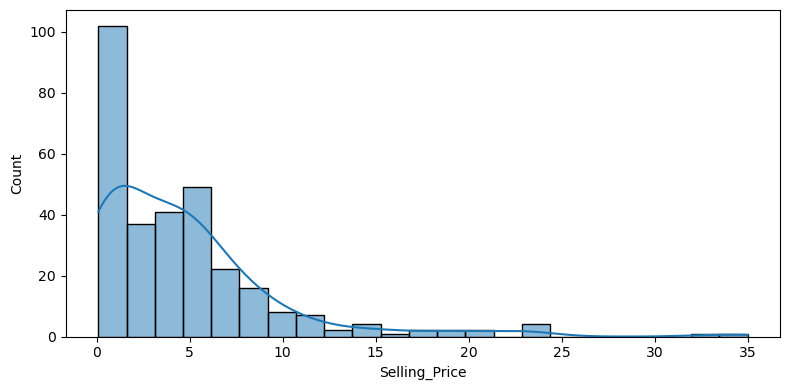

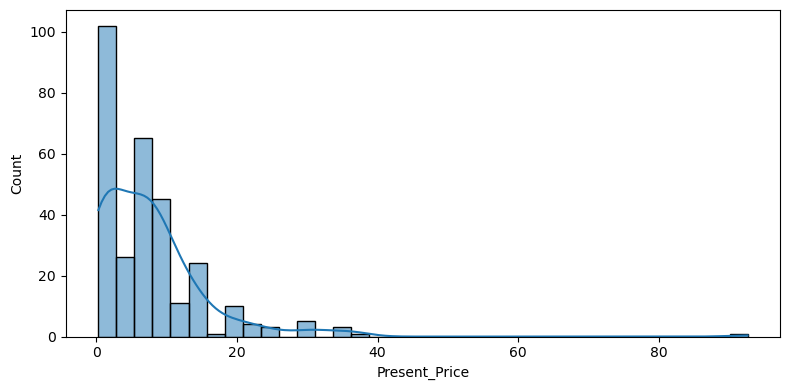

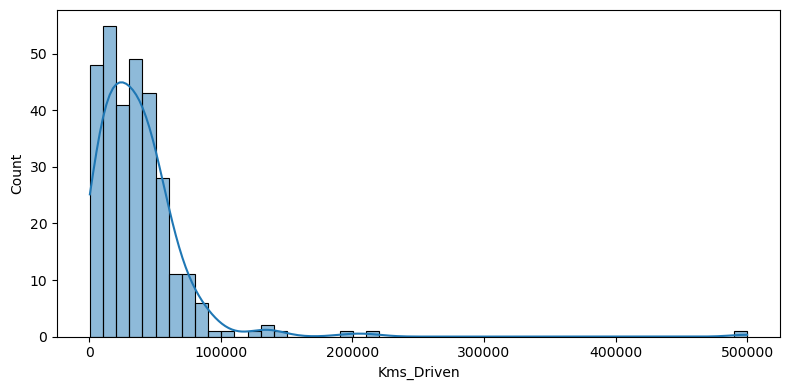

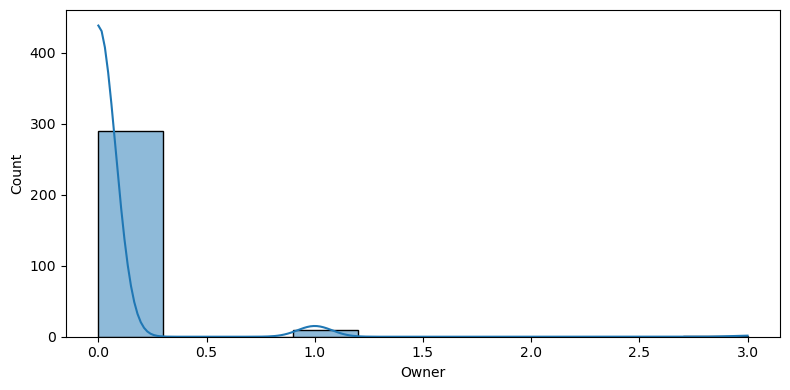

In [9]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col, data=df, kde=True)
    plt.tight_layout()
    plt.show()

#### b. Categorical Col

In [10]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


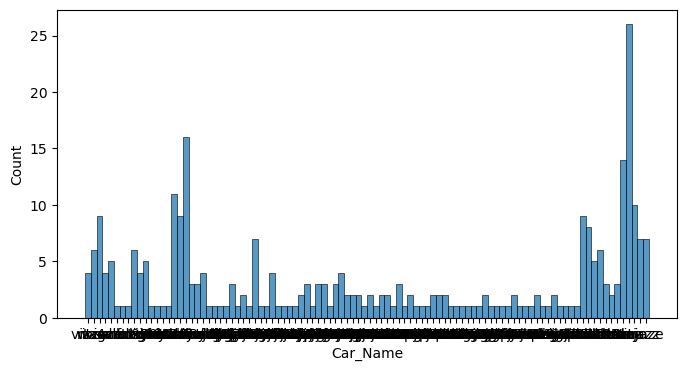

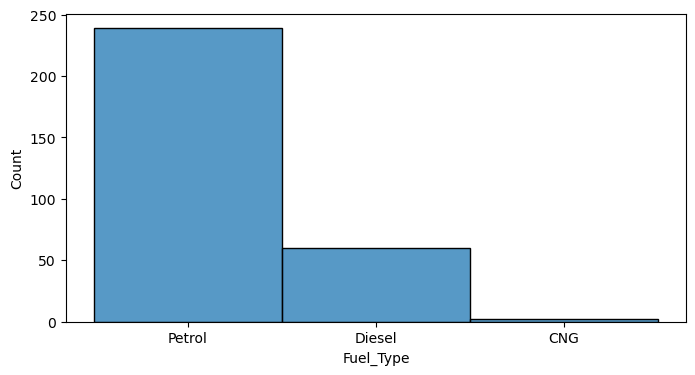

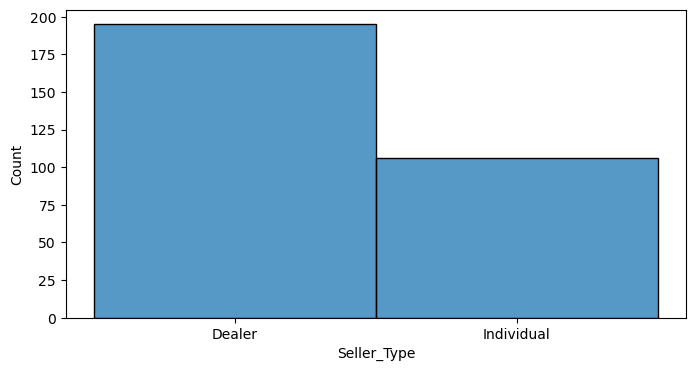

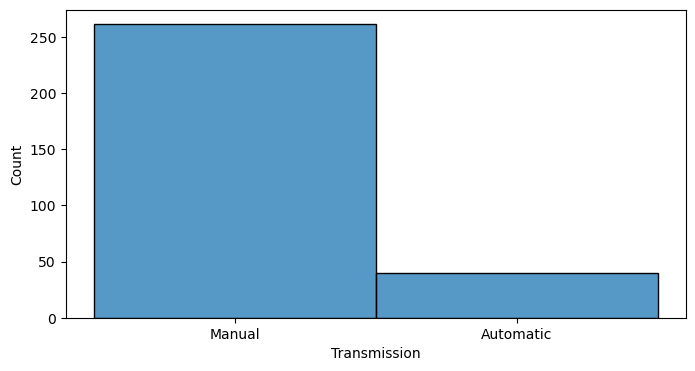

In [11]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(x=col, data=df)

In [12]:
#### iii. Temporable variable
temp_cols = df.loc[:,['Year']]
temp_cols

,Year
0,2014
1,2013
2,2017
3,2011
4,2014
...,...
296,2016
297,2015
298,2009
299,2017


<Axes: xlabel='Year', ylabel='Count'>

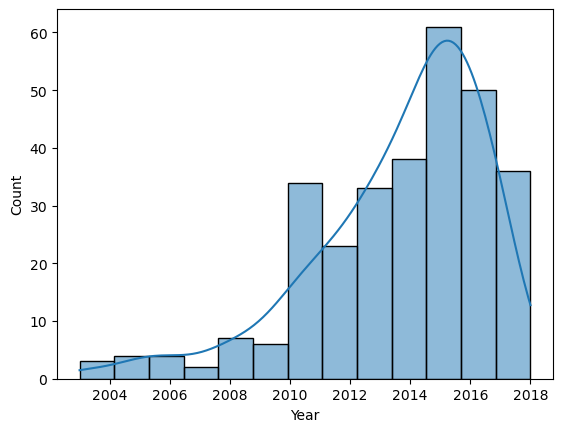

In [13]:
sns.histplot(x=df.Year, data=df, kde=True)

### ii. Bivariate Analysis

#### a. Numerical Columns

<Figure size 800x400 with 0 Axes>

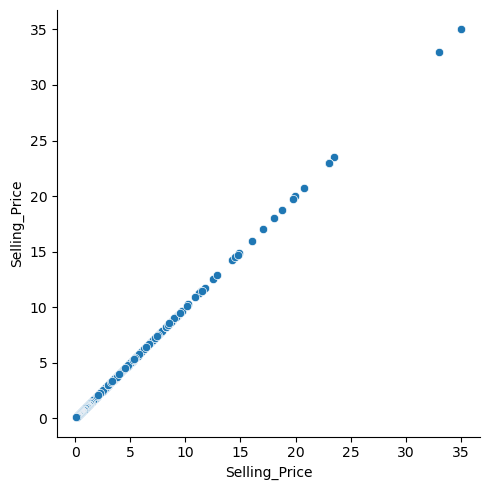

<Figure size 800x400 with 0 Axes>

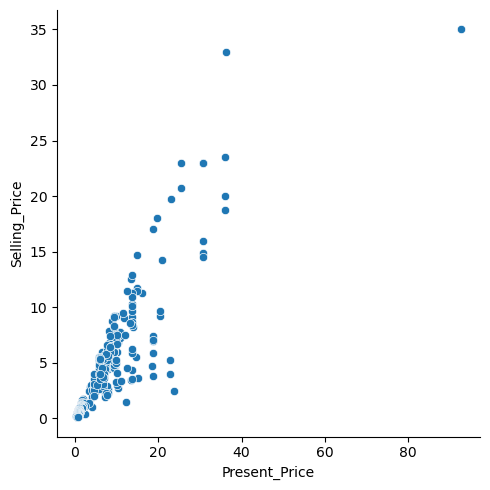

<Figure size 800x400 with 0 Axes>

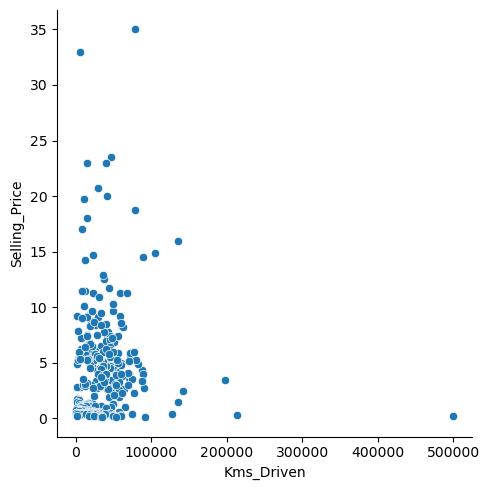

<Figure size 800x400 with 0 Axes>

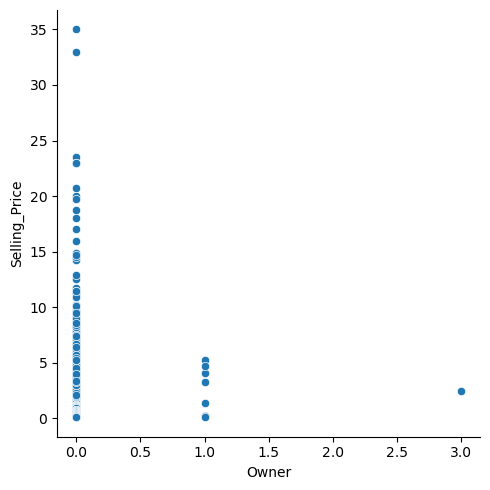

In [14]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.relplot(x=col, y=df.Selling_Price, data=df)
    plt.tight_layout()
    plt.show()

#### b. Categorical Columns

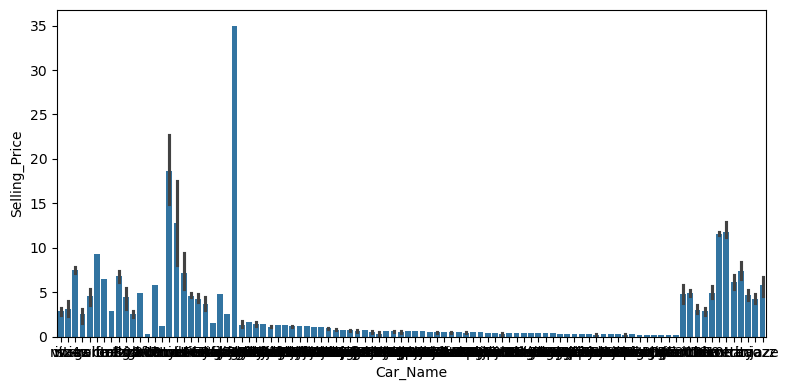

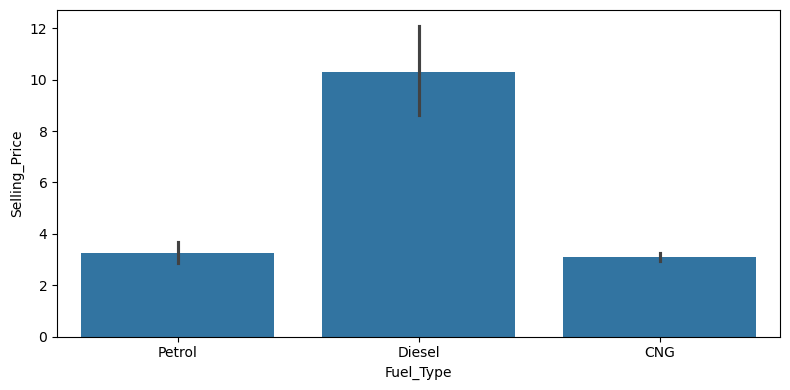

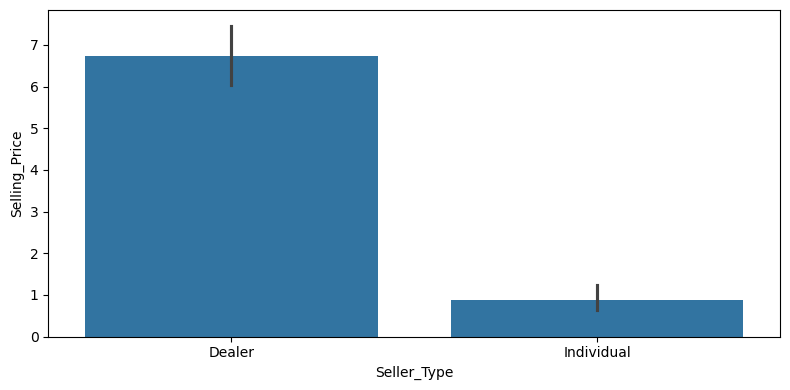

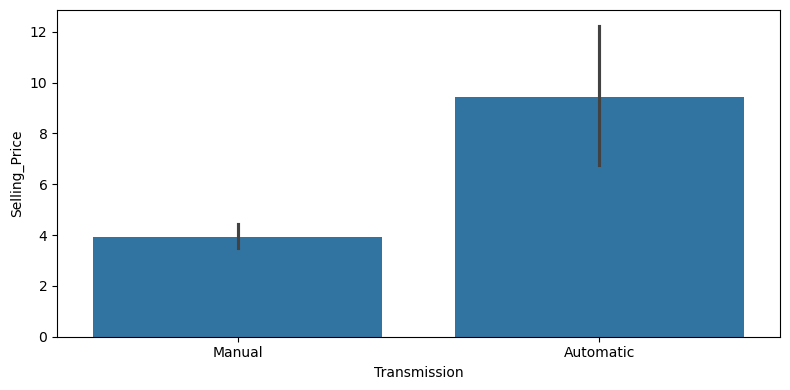

In [15]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(x=col, y=df.Selling_Price, data=df)
    plt.tight_layout()
    plt.show()

#### c. Temporable Variables

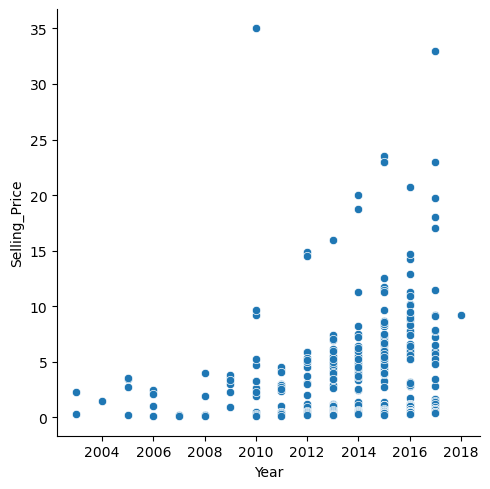

In [16]:
sns.relplot(x=df.Year, y=df.Selling_Price, data=df)

### 3. Multivariate Analysis

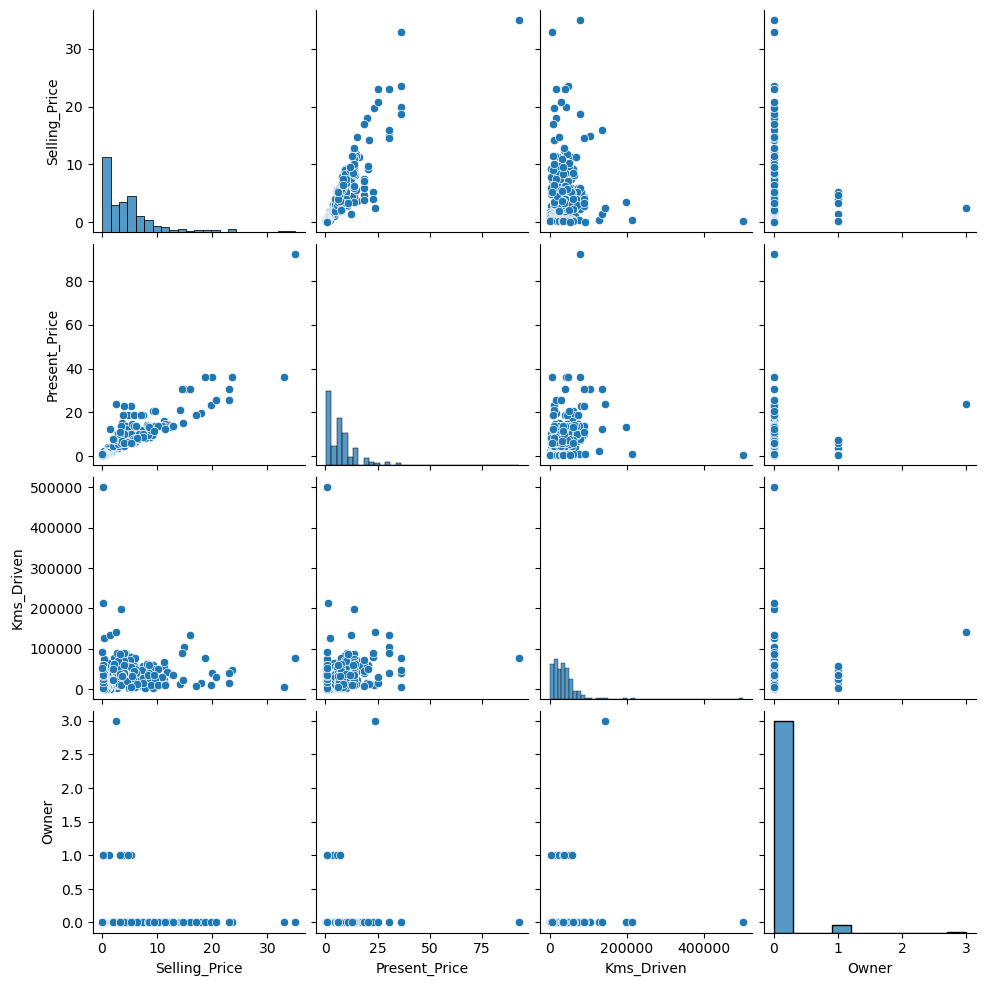

In [17]:
sns.pairplot(num_cols)

## 5. Data Preprocessing

### i Checking Null valuse/Outliers

In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

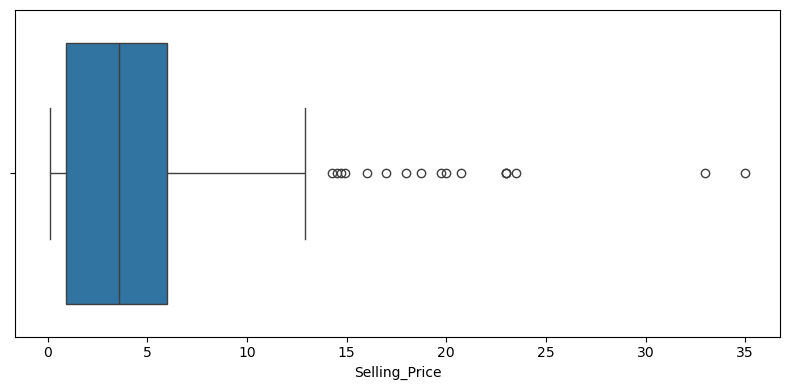

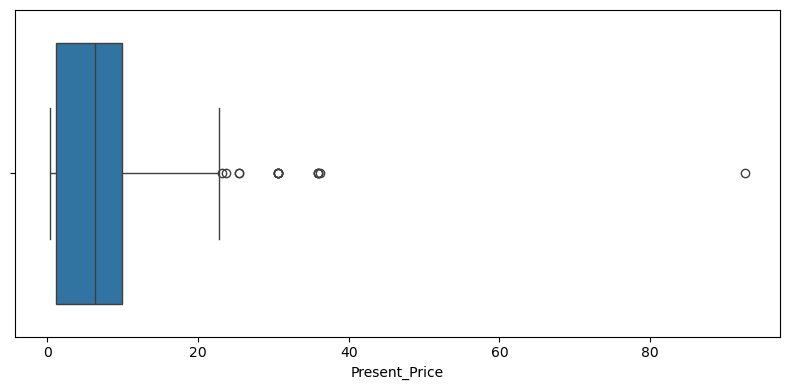

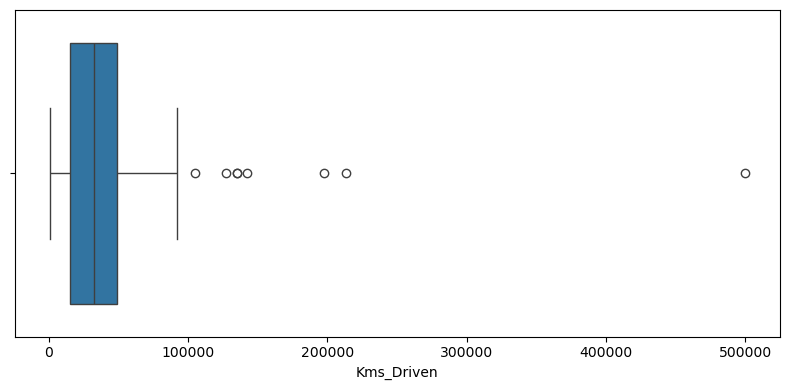

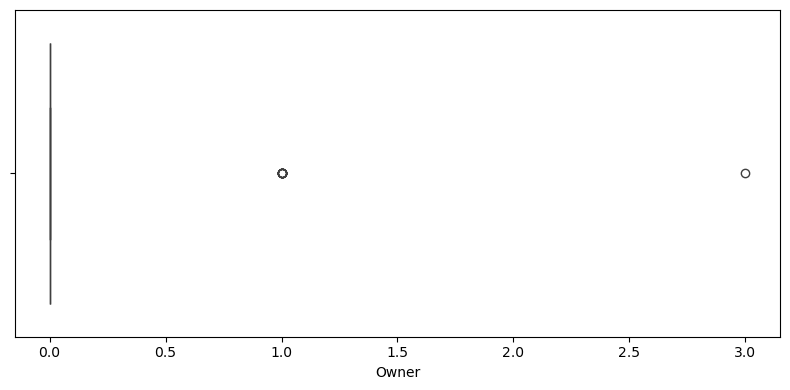

In [19]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

In [20]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr
    median = df[col].median()
    print(f"{col} ub", ub)
    print(f"{col} lb", lb)
    print(f"{col} median", median)
    print("-----------------------------------------------------------------------")

Selling_Price ub 13.649999999999999
Selling_Price lb -6.749999999999999
Selling_Price median 3.6
-----------------------------------------------------------------------
Present_Price ub 22.950000000000003
Present_Price lb -11.850000000000001
Present_Price median 6.4
-----------------------------------------------------------------------
Kms_Driven ub 99417.5
Kms_Driven lb -35650.5
Kms_Driven median 32000.0
-----------------------------------------------------------------------
Owner ub 0.0
Owner lb 0.0
Owner median 0.0
-----------------------------------------------------------------------


In [21]:
# df.loc[(df['Selling_Price'] > 13.65) | (df['Selling_Price'] < -6.75), 'Selling_Price'] = 3.6

In [22]:
# df.loc[(df['Present_Price'] > 22.95) | (df['Present_Price'] < -11.85), 'Present_Price'] = 6.4

In [23]:
# df.loc[(df['Kms_Driven'] > 99417) | (df['Kms_Driven'] < -11.85), 'Kms_Driven'] = 32000

In [24]:
df['Age'] = 2020 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [25]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


### ii. Scaling

In [26]:
num_cols

,Selling_Price,Present_Price,Kms_Driven,Owner
0,3.35,5.59,27000,0
1,4.75,9.54,43000,0
2,7.25,9.85,6900,0
3,2.85,4.15,5200,0
4,4.60,6.87,42450,0
...,...,...,...,...
296,9.50,11.60,33988,0
297,4.00,5.90,60000,0
298,3.35,11.00,87934,0
299,11.50,12.50,9000,0


In [27]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df['Kms_Driven_Scaled'] = scaler.fit_transform(df[['Kms_Driven']])

In [28]:
# df.drop('Kms_Driven', axis=1, inplace= True)

In [29]:
df.drop('Car_Name', axis=1, inplace=True)

In [30]:
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


### iii. Encoding

In [31]:
cat_cols.drop('Car_Name', axis=1, inplace=True)

In [32]:
cat_cols

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [33]:
for col in cat_cols:
    print(f"{col} values counts",cat_cols[col].value_counts())
    print("---------------------------------------------------")

Fuel_Type values counts Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
---------------------------------------------------
Seller_Type values counts Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
---------------------------------------------------
Transmission values counts Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
---------------------------------------------------


In [34]:
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True, dtype=int)

In [35]:
df_encoded

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


## 6. Feature Selection

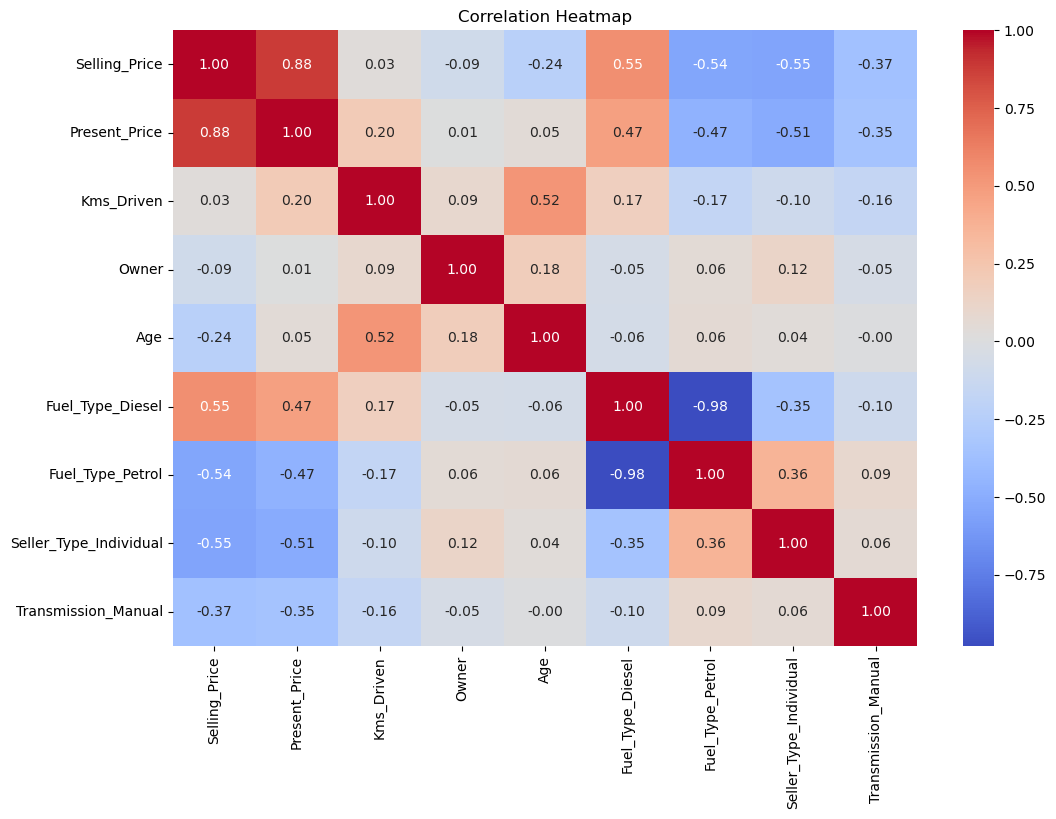

In [36]:
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# df_encoded.drop('Fuel_Type_Petrol', axis=1, inplace=True)

## 7. Feature Extraction

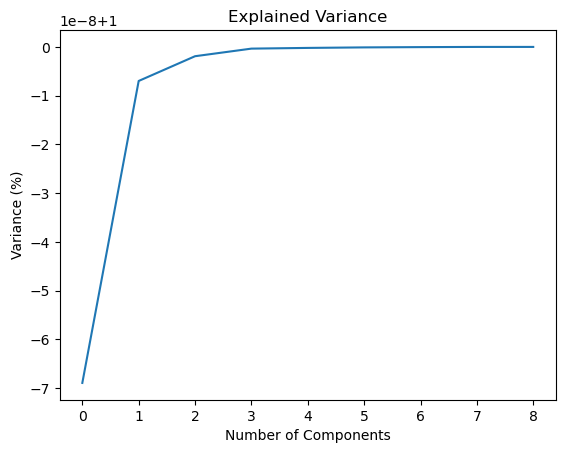

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
pc=pca.fit_transform(df_encoded)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [39]:
# pca = PCA(n_components=1)
# new_data = pca.fit_transform(df_encoded)

In [40]:
# new_data

In [41]:
# This will be the new data fed to the algorithm.

# Column names pattern
# column_names = ['pc1']

# Create DataFrame
# principal_df = pd.DataFrame(data=new_data, columns=column_names)
# principal_df

In [42]:
# final_df = pd.concat([principal_df, df['Selling_Price']], axis=1)

In [43]:
# final_df

## 8. Split the Data

In [44]:
df_encoded.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [45]:
X = df_encoded.drop('Selling_Price', axis=1)
X

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,4,1,0,0,1
297,5.90,60000,0,5,0,1,0,1
298,11.00,87934,0,11,0,1,0,1
299,12.50,9000,0,3,1,0,0,1


In [46]:
y = df_encoded.loc[:,['Selling_Price']]
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [48]:
print('Xtrain shape:', X_train.shape)
print('Xtest shape:', X_test.shape)
print('ytrain shape:', y_train.shape)
print('ytest shape:', y_test.shape)

Xtrain shape: (240, 8)
Xtest shape: (61, 8)
ytrain shape: (240, 1)
ytest shape: (61, 1)


## 9. Fit the data to the model

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_predict = model.predict(X_test)

In [51]:
y_test = y_test.reset_index(drop=True)

In [52]:
y_test.head()

,Selling_Price
0,7.40
1,4.00
2,0.50
3,3.15
4,1.25


In [53]:
y_predict

array([[ 7.86273200e+00],
       [ 2.96828691e+00],
       [-5.90305107e-01],
       [ 4.21335952e+00],
       [ 4.83175534e-01],
       [ 5.82053813e+00],
       [ 1.95679784e+00],
       [ 2.55809661e+00],
       [ 7.70870833e+00],
       [ 9.78692192e-01],
       [ 8.13484343e+00],
       [ 3.51207180e+00],
       [ 4.90669281e+00],
       [ 4.63905587e+00],
       [-2.15886643e+00],
       [ 3.13874624e+00],
       [ 7.98256903e+00],
       [ 6.75937638e+00],
       [ 6.90426580e+00],
       [ 8.01440587e+00],
       [ 4.31168610e+00],
       [ 4.00336757e+00],
       [ 1.13040883e+01],
       [ 8.07939189e+00],
       [ 9.54399823e+00],
       [ 3.52133877e+00],
       [ 3.80609808e+00],
       [ 1.06074722e+00],
       [-6.01732475e-01],
       [-6.19712043e-01],
       [ 1.32818516e-03],
       [-1.28500691e+00],
       [ 4.28533553e+00],
       [ 2.06769487e+01],
       [ 1.87563232e+01],
       [ 4.27292100e+00],
       [ 3.48602852e+00],
       [ 1.66739677e+00],
       [-4.3

## 10. Model Evaluation

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_predict = model.predict(X_test)
print("R2 score:",r2_score(y_test, y_predict))
print("MAE:",mean_absolute_error(y_test, y_predict))
print("MSE:",mean_squared_error(y_test, y_predict))

R2 score: 0.8625260513315253
MAE: 1.0998575552990955
MSE: 2.982384861859749


In [55]:
df_encoded

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [80]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# X: shape (301, 8)
# y: shape (301, 1)
# Make sure you already have X and y from your dataset
# Example: X = df.drop(columns=['target']).values
#          y = df[['target']].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept (bias) term to X
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # now shape is (301, 9)

# Initialize theta for all weights (8 features + 1 bias)
theta = np.random.randn(X_b.shape[1], 1)  # shape: (9, 1)

# Gradient Descent settings
learning_rate = 0.005
n_iterations = 3000
m = X_b.shape[0]

# Gradient Descent loop
for iteration in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Predictions
y_pred = X_b.dot(theta)

# R2 Score
r2 = r2_score(y, y_pred)
print("R2 Score:", round(r2 * 100, 2), "%")


R2 Score: 88.25 %
